In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import sys
sys.path.append('../')
# from rhkpy import *
import rhkpy

# sys.path.append('../rhkpy/')
# import rhkpy

import matplotlib.pyplot as pl
import numpy as np
import xarray as xr
from scipy import ndimage

In [13]:
topo = rhkpy.rhkpy('topo_ABC_Graphite-Sample5_9K_2021_08_12_15_11_14_726.sm4')

In [7]:
topo.image.attrs

{'filename': 'topo_ABC_Graphite-Sample5_9K_2021_08_12_15_11_14_726.sm4',
 'xoffset': -142.51390409447674,
 'yoffset': -51.648785998059665,
 'xoffset_units': 'nm',
 'yoffset_units': 'nm',
 'bias': 0.49999982,
 'bias units': 'V',
 'setpoint': 99.99999439624929,
 'setpoint units': 'pA',
 'measurement date': '08/12/21',
 'measurement time': '15:01:33',
 'scan angle': 0.0}

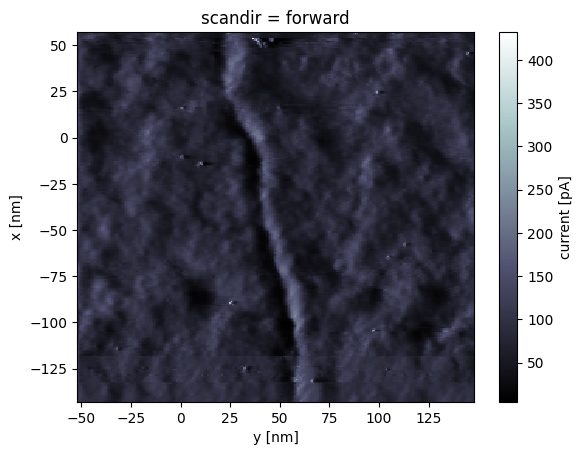

In [8]:
topo.image.isel(scandir=0)['current'].plot(cmap='bone')

In [10]:
topo_data = topo.image.isel(scandir=1)['topography'].data

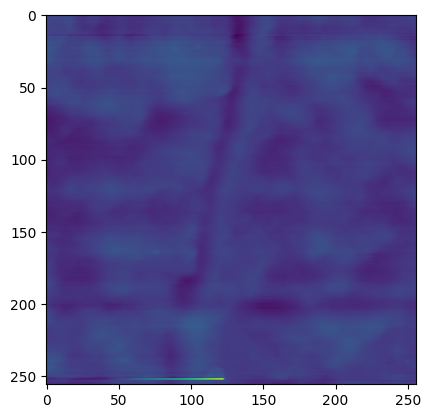

In [12]:
pl.imshow(topo_data)

# map

In [21]:
filename_map = 'hopg_300k_2020_08_11_16_04_06_999.sm4'
mapspec = rhkpy(filename_map)

In [23]:
mapspec.repetitions, mapspec.alternate

(4, True)

In [24]:
mapspec.spectra

<xarray.Dataset>
Dimensions:      (bias: 241, specpos_x: 2, specpos_y: 2, repetitions: 4,
                  biasscandir: 2)
Coordinates:
  * bias         (bias) float64 0.6 0.595 0.59 0.585 ... -0.59 -0.595 -0.6
  * specpos_x    (specpos_x) float64 37.3 37.3
  * specpos_y    (specpos_y) float64 37.3 -12.7
  * repetitions  (repetitions) int32 0 1 2 3
  * biasscandir  (biasscandir) <U5 'left' 'right'
Data variables:
    lia          (bias, specpos_x, specpos_y, repetitions, biasscandir) float64 ...
    current      (bias, specpos_x, specpos_y, repetitions, biasscandir) float64 ...
    x            (specpos_x, specpos_y) float64 37.3 37.3 37.3 37.3
    y            (specpos_x, specpos_y) float64 37.3 12.3 -12.7 -37.7
Attributes: (12/13)
    filename:           hopg_300k_2020_08_11_16_04_06_999.sm4
    bias:               0.39999998
    bias units:         V
    setpoint:           499.99998585903427
    setpoint units:     pA
    measurement date:   08/11/20
    ...                 ...
    scan angle:         0.0
    LI amplitude:       4.999957799
    LI amplitude unit:  mV
    LI frequency:       1300.0
    LI frequency unit:  Hz
    LI phase:           -103.9999999

In [6]:
mapspec.spectra.attrs

{'filename': 'hopg_300k_2020_08_11_16_04_06_999.sm4',
 'bias': 0.39999998,
 'bias units': 'V',
 'setpoint': 499.99998585903427,
 'setpoint units': 'pA',
 'measurement date': '08/11/20',
 'measurement time': '15:49:04',
 'scan angle': 0.0,
 'LI amplitude': 4.999957799,
 'LI amplitude unit': 'mV',
 'LI frequency': 1300.0,
 'LI frequency unit': 'Hz',
 'LI phase': -103.9999999}

# Reorganize $dI/dV$ line spectra

In [7]:
filename_line = 'line_9K_ABC6_2020_11_01_12_12_27_213.sm4'
linespec = rhkpy(filename_line)

In [7]:
linespec.datatype, linespec.spectype

('line', 'iv')

In [8]:
linespec.spectra.attrs

{'filename': 'line_9K_ABC6_2020_11_01_12_12_27_213.sm4',
 'bias': 0.49999988,
 'bias units': 'V',
 'setpoint': 99.99999439624929,
 'setpoint units': 'pA',
 'measurement date': '11/01/20',
 'measurement time': '11:32:09'}

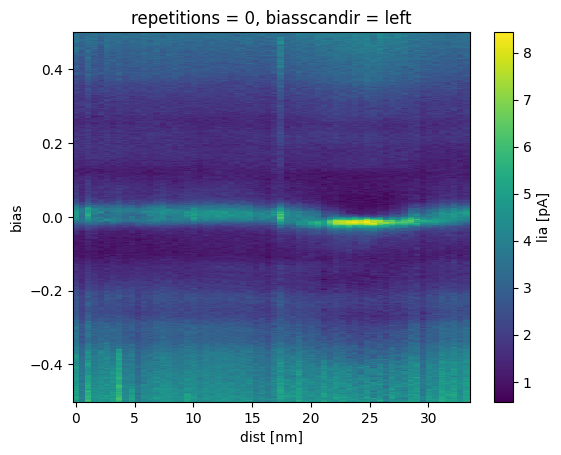

In [9]:
linespec.spectra.isel(biasscandir = 0, repetitions = 0)['lia'].plot()

# single spectra

In [8]:
filename_singlespec = 'dI-dV_Stripes-9K-HOPG-SPI2-3_2021_09_07_10_23_58_152.sm4'
spec = rhkpy(filename_singlespec)

In [9]:
spec.spectra.attrs

{'filename': 'dI-dV_Stripes-9K-HOPG-SPI2-3_2021_09_07_10_23_58_152.sm4',
 'speccoord_x': -97.14440096786348,
 'speccoord_y': -73.07891536356692,
 'speccoord_x units': 'nm',
 'speccoord_y units': 'nm',
 'bias': 0.59999996,
 'bias units': 'V',
 'setpoint': 39.999996370720936,
 'setpoint units': 'pA',
 'measurement date': '09/07/21',
 'measurement time': '10:19:42',
 'LI amplitude': 10.0,
 'LI amplitude unit': 'mV',
 'LI frequency': 1266.9999999999998,
 'LI frequency unit': 'Hz',
 'LI phase': -104.9999999}

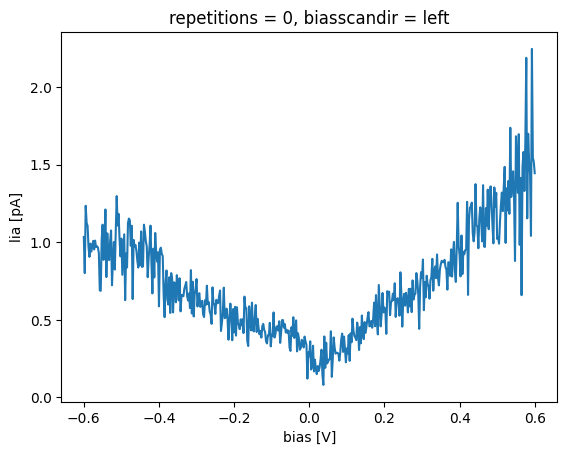

In [12]:
spec.spectra.isel(repetitions = 0, biasscandir = 0)['lia'].plot(label = 'first spectrum')

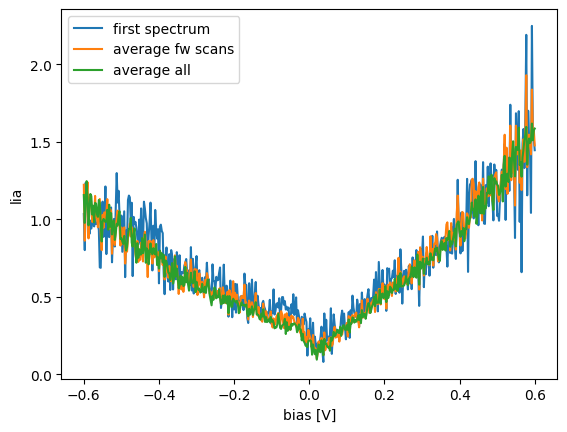

In [13]:
spec.spectra.isel(repetitions = 0, biasscandir = 0)['lia'].plot(label = 'first spectrum')
spec.spectra.isel(biasscandir = 0).mean(dim='repetitions')['lia'].plot(label = 'average fw scans')
spec.spectra.mean(dim=['repetitions', 'biasscandir'])['lia'].plot(label = 'average all')
pl.legend()

# processing topographic data

In [14]:
from spym.process.level import align
from spym.process.level import plane

In [10]:
filename_map_large = 'C:/Users/zrbyt/OneDrive - energia.mta.hu/Documents/work_MFA/cikkek - published/2022/RG magnetism/figures/splitting/9K_ABC6_2020_11_02_08_47_19_209.sm4'
mapspec = rhkpy(filename_map_large)

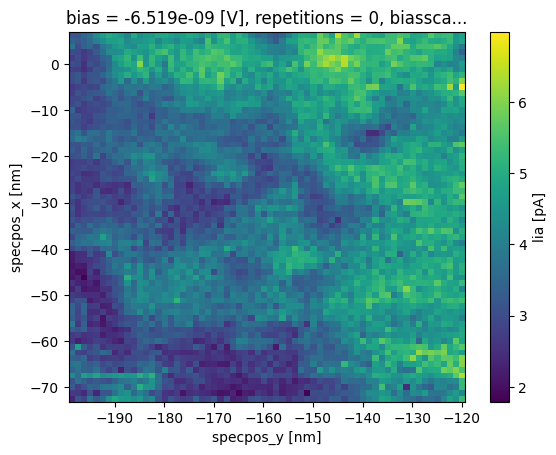

In [11]:
mapspec.spectra.isel(biasscandir = 0, repetitions = 0).sel(bias = 0, method='nearest')['lia'].plot()

# topography

In [17]:
topo = rhkpy.stmdata('topo_ABC_Graphite-Sample5_9K_2021_08_12_15_11_14_726.sm4')

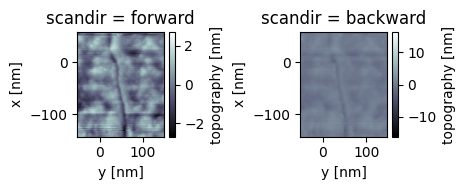

In [18]:
fig, (ax1, ax2) = pl.subplots(1, 2, figsize = (4.7, 2))
topo.image.isel(scandir = 0)['topography'].plot(cmap = 'bone', ax = ax1)
topo.image.isel(scandir = 1)['topography'].plot(cmap = 'bone', ax = ax2)
pl.tight_layout()

In [19]:
topo.image.attrs

{'filename': 'topo_ABC_Graphite-Sample5_9K_2021_08_12_15_11_14_726.sm4',
 'xoffset': -142.51390409447674,
 'yoffset': -51.648785998059665,
 'xoffset_units': 'nm',
 'yoffset_units': 'nm',
 'bias': 0.49999982,
 'bias units': 'V',
 'setpoint': 99.99999439624929,
 'setpoint units': 'pA',
 'measurement date': '08/12/21',
 'measurement time': '15:01:33'}

# Mapping the spectrum coordinates to the topography image

In [12]:
mapspec = rhkpy(filename_map)

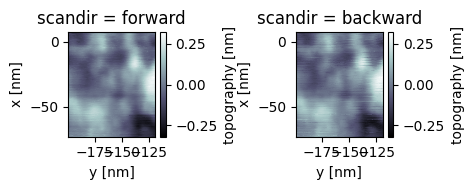

In [21]:
fig, (ax1, ax2) = pl.subplots(1, 2, figsize = (4.7, 2))
mapspec.image.isel(scandir = 0)['topography'].plot(cmap = 'bone', ax = ax1)
mapspec.image.isel(scandir = 1)['topography'].plot(cmap = 'bone', ax = ax2)
pl.tight_layout()

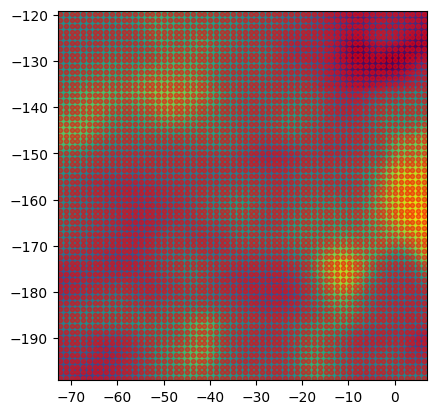

In [22]:
xx = mapspec.image.coords['x'].data
yy = mapspec.image.coords['y'].data
dx = (xx[1] - xx[0])/2.
dy = (yy[1] - yy[0])/2.
ext = [xx[0] - dx, xx[-1] + dx, yy[0] - dy, yy[-1] + dy]
pl.imshow(mapspec.image.isel(scandir = 0)['topography'].data,
         extent = ext)
pl.scatter(mapspec.spectra['x'].data, mapspec.spectra['y'].data, marker = '.', alpha = 0.5, color = 'r')

In [23]:
mapspec.spymdata.Topography_Forward.attrs['RHK_Angle']

0.0

## trying line spectra

In [13]:
linespec = rhkpy(filename_line)

In [25]:
linespec.spymdata.Topography_Forward.attrs['RHK_Angle']

168.75032

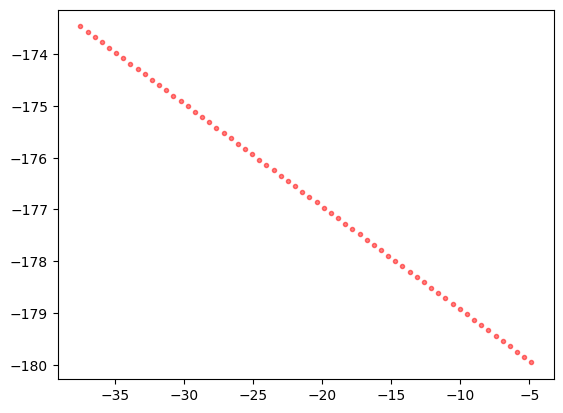

In [26]:
pl.scatter(linespec.spectra['x'].data, linespec.spectra['y'].data, marker = '.', alpha = 0.5, color = 'r')

# Implementing $I(z)$ spectra

## Iz map

In [14]:
filename_izmap = 'Iz_map_Stripes-9K-HOPG-SPI2-3_2021_09_08_11_21_03_743.sm4'
izmap = rhkpy(filename_izmap, repetitions = 10)

In [28]:
izmapspym = rhkpy.load_spym(filename_izmap)

In [29]:
print(izmap.datatype, izmap.spectype)

map iz


In [30]:
izmap.image.attrs

{'filename': 'Iz_map_Stripes-9K-HOPG-SPI2-3_2021_09_08_11_21_03_743.sm4',
 'xoffset': -115.0443512398791,
 'yoffset': -89.23446900843679,
 'xoffset_units': 'nm',
 'yoffset_units': 'nm',
 'bias': 1.0,
 'bias units': 'V',
 'setpoint': 79.99999968033578,
 'setpoint units': 'pA',
 'measurement date': '09/08/21',
 'measurement time': '09:38:39'}

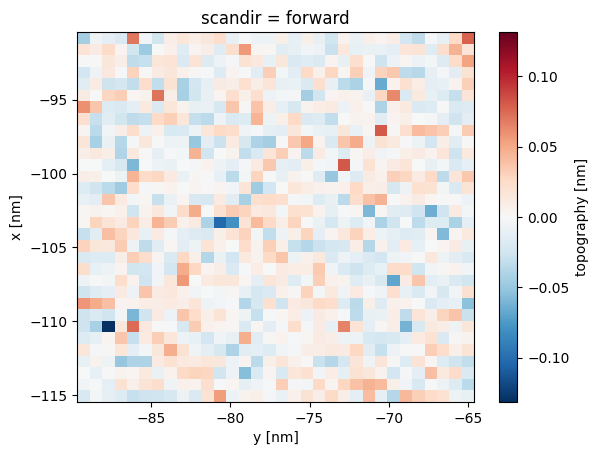

In [31]:
izmap.image.isel(scandir = 0)['topography'].plot()

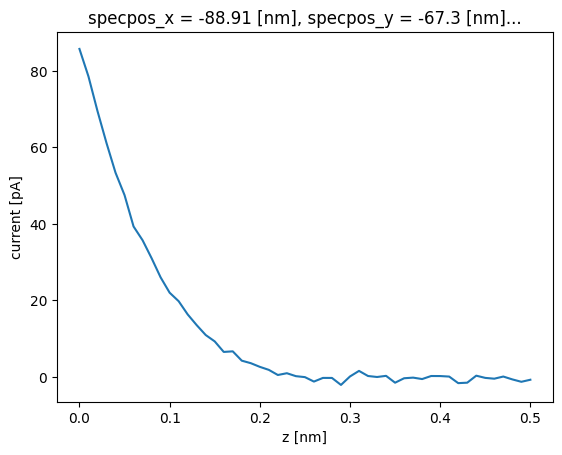

In [32]:
izmap.spectra.isel(zscandir = 0, repetitions = 0, specpos_x = 0, specpos_y = 0)['current'].plot()

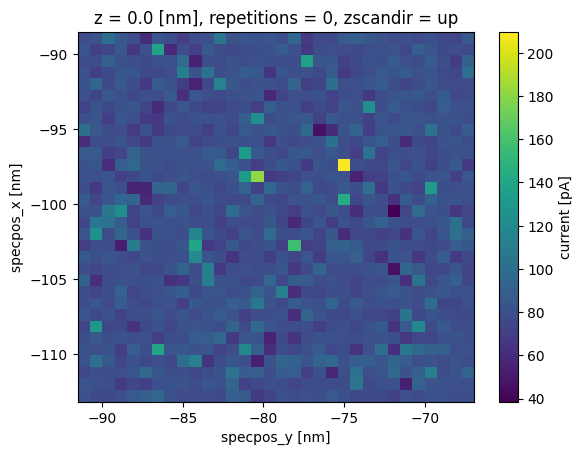

In [18]:
izmap.spectra.isel(zscandir = 0, repetitions = 0).sel(z = 0, method='nearest')['current'].plot()

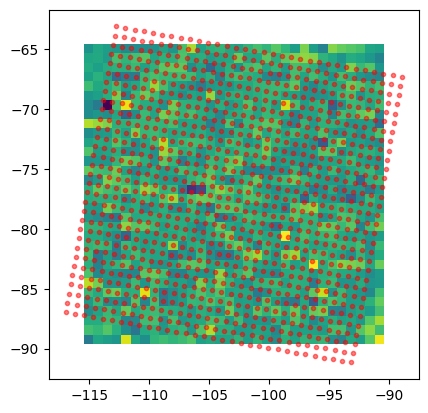

In [34]:
xx = izmap.image.coords['x'].data
yy = izmap.image.coords['y'].data
dx = (xx[1] - xx[0])/2.
dy = (yy[1] - yy[0])/2.
ext = [xx[0] - dx, xx[-1] + dx, yy[0] - dy, yy[-1] + dy]
pl.imshow(izmap.image.isel(scandir = 0)['topography'].data,
         extent = ext)
pl.scatter(izmap.spectra['x'].data, izmap.spectra['y'].data, marker = '.', alpha = 0.5, color = 'r')

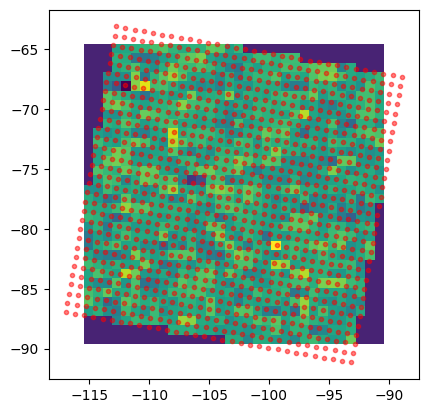

In [35]:
from scipy import ndimage

xx = izmap.image.coords['x'].data
yy = izmap.image.coords['y'].data
dx = (xx[1] - xx[0])/2.
dy = (yy[1] - yy[0])/2.
ext = [xx[0] - dx, xx[-1] + dx, yy[0] - dy, yy[-1] + dy]

angle = izmap.spymdata.Topography_Forward.attrs['RHK_Angle']
rotated_topo = ndimage.rotate(
    izmap.image.isel(scandir = 0)['topography'].data,
    angle,
    reshape=False,
    mode='constant',
    cval=-0.1
)
pl.imshow(rotated_topo, extent = ext)
pl.scatter(izmap.spectra['x'].data, izmap.spectra['y'].data, marker = '.', alpha = 0.5, color = 'r')

In [36]:
izmap.spymdata.Topography_Forward.attrs['RHK_Angle']

-10.0

## Iz single spectrum

In [37]:
filename_izspec = 'Iz_Stripes-9K-HOPG-SPI2-3_2021_09_07_10_15_28_529.sm4'
izspec = rhkpy.stmdata(filename_izspec)

In [38]:
print(izspec.datatype, izspec.spectype, izspec.numberofspectra, izspec.repetitions)

spec iz 20 10


In [39]:
izspec.spectra.attrs

{'filename': 'Iz_Stripes-9K-HOPG-SPI2-3_2021_09_07_10_15_28_529.sm4',
 'speccoord_x': -97.14440096786348,
 'speccoord_y': -73.07891536356692,
 'speccoord_x units': 'nm',
 'speccoord_y units': 'nm',
 'bias': 0.6,
 'bias units': 'V',
 'setpoint': 39.99999984016789,
 'setpoint units': 'pA',
 'measurement date': '09/07/21',
 'measurement time': '10:15:22'}

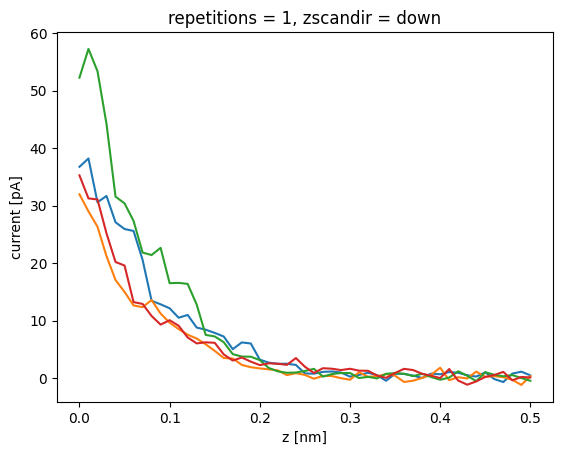

In [40]:
izspec.spectra.isel(zscandir = 0, repetitions = 0)['current'].plot()
izspec.spectra.isel(zscandir = 1, repetitions = 0)['current'].plot()
izspec.spectra.isel(zscandir = 0, repetitions = 1)['current'].plot()
izspec.spectra.isel(zscandir = 1, repetitions = 1)['current'].plot()

# Iz line spectrum

In [53]:
izlinespec = rhkpy(filename_izline)

In [54]:
izlinespec.repetitions

10

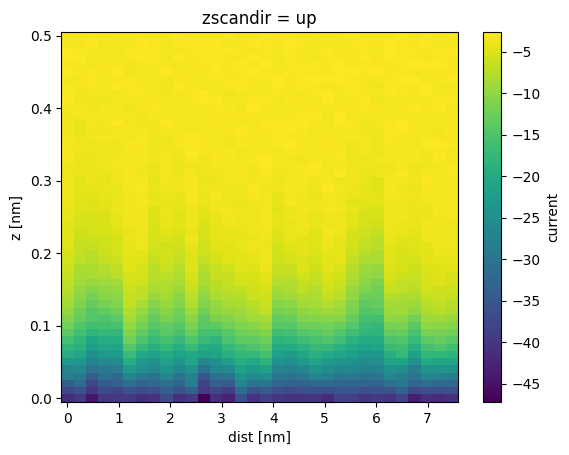

In [55]:
izlinespec.spectra.isel(zscandir=0).mean(dim='repetitions')['current'].plot()

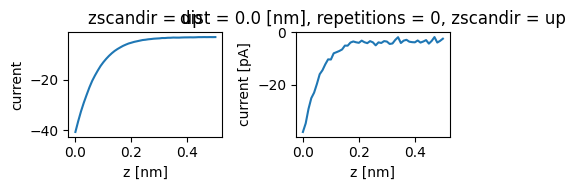

In [56]:
fig, (ax1, ax2) = pl.subplots(1, 2, figsize = (4.7, 2))
izlinespec.spectra.isel(zscandir=0).mean(dim=['repetitions', 'dist'])['current'].plot(ax=ax1)
izlinespec.spectra.isel(zscandir=0, repetitions=0, dist=0)['current'].plot(ax=ax2)
pl.tight_layout()

# Adding more metadata

In [48]:
mapspec.spymdata.Topography_Forward.attrs;

In [49]:
mapspec.image.attrs

{'filename': 'C:/Users/zrbyt/OneDrive - energia.mta.hu/Documents/work_MFA/cikkek - published/2022/RG magnetism/figures/splitting/9K_ABC6_2020_11_02_08_47_19_209.sm4',
 'xoffset': -72.75549242236056,
 'yoffset': -198.94855020352597,
 'xoffset_units': 'nm',
 'yoffset_units': 'nm',
 'bias': 0.49999973,
 'bias units': 'V',
 'setpoint': 99.99999439624929,
 'setpoint units': 'pA',
 'measurement date': '11/01/20',
 'measurement time': '21:29:48',
 'scan angle': 0.0}

In [19]:
mapspec.spectra.attrs

{'filename': 'C:/Users/zrbyt/OneDrive - energia.mta.hu/Documents/work_MFA/cikkek - published/2022/RG magnetism/figures/splitting/9K_ABC6_2020_11_02_08_47_19_209.sm4',
 'bias': 0.49999973,
 'bias units': 'V',
 'setpoint': 99.99999439624929,
 'setpoint units': 'pA',
 'measurement date': '11/01/20',
 'measurement time': '21:29:57',
 'scan angle': 0.0,
 'LI amplitude': 10.0,
 'LI amplitude unit': 'mV',
 'LI frequency': 1300.0,
 'LI frequency unit': 'Hz',
 'LI phase': -102.9999998}

# Implementing repetitions

In [50]:
filename_izmap = 'Iz_map_Stripes-9K-HOPG-SPI2-3_2021_09_08_11_21_03_743.sm4'
izmap = rhkpy(filename_izmap)

In [51]:
izmap.repetitions

10

In [21]:
filename_map_large = 'C:/Users/zrbyt/OneDrive - energia.mta.hu/Documents/work_MFA/cikkek - published/2022/RG magnetism/figures/splitting/9K_ABC6_2020_11_02_08_47_19_209.sm4'
mapspec = rhkpy(filename_map_large)

In [22]:
mapspec.repetitions

1

In [23]:
mapspec.numberofspectra

2

In [24]:
mapspec.spymdata.Topography_Forward.attrs['RHK_ScanType'], mapspec.spymdata.Topography_Forward.attrs['RHK_ScanTypeName']

(0, 'RHK_SCAN_RIGHT')

# Plotting spectrum positions

In [3]:
filename_izmap = 'Iz_map_Stripes-9K-HOPG-SPI2-3_2021_09_08_11_21_03_743.sm4'
izmap = rhkpy(filename_izmap)

In [4]:
izmap.spectra

<xarray.Dataset>
Dimensions:      (z: 51, specpos_x: 32, specpos_y: 32, repetitions: 10,
                  zscandir: 2)
Coordinates:
  * z            (z) float64 0.0 0.01 0.02 0.03 0.04 ... 0.46 0.47 0.48 0.49 0.5
  * specpos_x    (specpos_x) float64 -88.91 -89.68 -90.45 ... -112.0 -112.8
  * specpos_y    (specpos_y) float64 -67.3 -68.07 -68.84 ... -90.38 -91.15
  * repetitions  (repetitions) int32 0 1 2 3 4 5 6 7 8 9
  * zscandir     (zscandir) <U4 'up' 'down'
Data variables:
    current      (z, specpos_x, specpos_y, repetitions, zscandir) float64 85....
    x            (specpos_x, specpos_y) float64 -88.91 -89.68 ... -116.2 -117.0
    y            (specpos_x, specpos_y) float64 -67.3 -67.17 ... -87.08 -86.95
Attributes: (12/13)
    filename:           Iz_map_Stripes-9K-HOPG-SPI2-3_2021_09_08_11_21_03_743...
    bias:               1.0
    bias units:         V
    setpoint:           79.99999968033578
    setpoint units:     pA
    measurement date:   09/08/21
    ...                 ...
    scan angle:         -10.0
    LI amplitude:       10.0
    LI amplitude unit:  mV
    LI frequency:       1266.9999999999998
    LI frequency unit:  Hz
    LI phase:           -104.9999999

In [5]:
topo = izmap.image.isel(scandir=0)

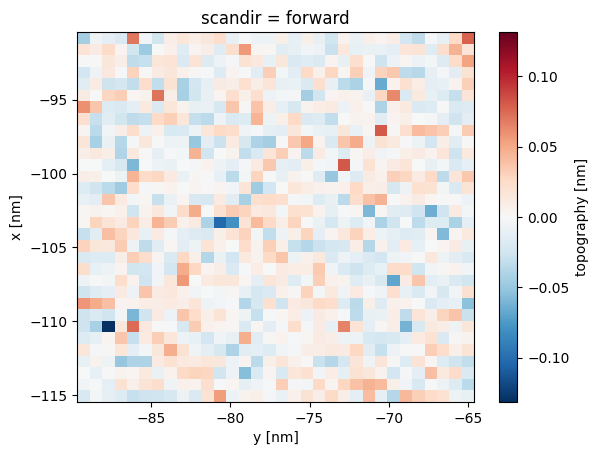

In [17]:
topo['topography'].plot()

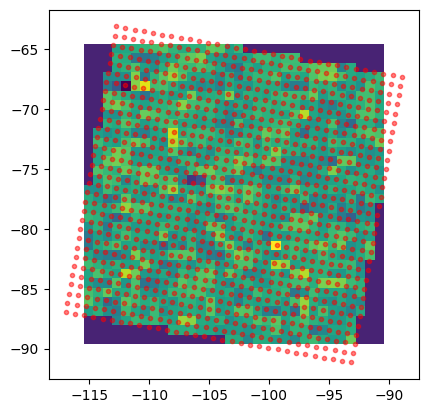

In [6]:
izmap.specpos()

In [7]:
izmap.image.attrs['scan angle']

-10.0

In [4]:
# import hvplot as hv
import hvplot.xarray

In [5]:
hvplot.extension('bokeh')

In [7]:
izmap.spectra.mean(dim=['repetitions', 'zscandir']).hvplot.line(
    x='z',
    y='current',
    # aspect=1,
    height=300, width=350)

:DynamicMap   [specpos_y,specpos_x]
   :Curve   [z]   (current)

In [135]:
iz1 = izmap.spectra.mean(dim=['repetitions', 'zscandir']).sel(specpos_x = -91, specpos_y = -112, method='nearest').hvplot.line(
    x='z',
    y='current',
    # aspect=1,
    height=300, width=350)
iz2 = izmap.spectra.mean(dim=['repetitions', 'zscandir']).sel(specpos_x = -89, specpos_y = -112, method='nearest').hvplot.line(
    x='z',
    y='current',
    # aspect=1,
    height=300, width=350)

In [136]:
iz1 * iz2

:Overlay
   .Curve.I  :Curve   [z]   (current)
   .Curve.II :Curve   [z]   (current)

In [137]:
iz1 + iz2

:Layout
   .Curve.I  :Curve   [z]   (current)
   .Curve.II :Curve   [z]   (current)

In [138]:
izplot = izmap.spectra.mean(dim=['repetitions', 'zscandir']).hvplot.line(
    x='z',
    y='current',
    # aspect=1,
    height=300, width=350,
    groupby=['specpos_x', 'specpos_y'])

In [139]:
print(izplot)

:DynamicMap   [specpos_x,specpos_y]


In [140]:
izplot

:DynamicMap   [specpos_x,specpos_y]
   :Curve   [z]   (current)

In [141]:
z = izmap.spectra.mean(dim=['repetitions', 'zscandir'])['current'].isel(specpos_x=0, specpos_y=0).hvplot.line(x='z', aspect=1)

In [142]:
print(z)

:Curve   [z]   (current)


In [11]:
izmap.spectra.mean(dim=['repetitions', 'zscandir']).hvplot.scatter(
    marker='o',
    x='z',
    y='current',
    # aspect=1,
    height=300, width=350)

:DynamicMap   [specpos_y,specpos_x]
   :Scatter   [z]   (current)

In [20]:
xx = izmap.spectra.coords['specpos_x'].data
yy = izmap.spectra.coords['specpos_y'].data

izcurves = izmap.spectra.mean(dim=['repetitions'])['current']

curve = izcurves.sel(specpos_x=xx[0], specpos_y=yy[0]).hvplot.line(
    aspect=1,
    color='r',
    alpha=0.1,
    groupby='zscandir'
)
for x in xx[1:10]:
    for y in yy[1:10]:
        curve = curve * izcurves.sel(specpos_x=x, specpos_y=y).hvplot.scatter(
            marker='o',
            aspect=1,
            color='r',
            alpha=0.02,
            groupby='zscandir'
        )

In [21]:
curve

:DynamicMap   [zscandir]
   :Overlay
      .Curve.I         :Curve   [z]   (current)
      .Scatter.I       :Scatter   [z]   (current)
      .Scatter.II      :Scatter   [z]   (current)
      .Scatter.III     :Scatter   [z]   (current)
      .Scatter.IV      :Scatter   [z]   (current)
      .Scatter.V       :Scatter   [z]   (current)
      .Scatter.VI      :Scatter   [z]   (current)
      .Scatter.VII     :Scatter   [z]   (current)
      .Scatter.VIII    :Scatter   [z]   (current)
      .Scatter.IX      :Scatter   [z]   (current)
      .Scatter.X       :Scatter   [z]   (current)
      .Scatter.XI      :Scatter   [z]   (current)
      .Scatter.XII     :Scatter   [z]   (current)
      .Scatter.XIII    :Scatter   [z]   (current)
      .Scatter.XIV     :Scatter   [z]   (current)
      .Scatter.XV      :Scatter   [z]   (current)
      .Scatter.XVI     :Scatter   [z]   (current)
      .Scatter.XVII    :Scatter   [z]   (current)
      .Scatter.XVIII   :Scatter   [z]   (current)
      .Scatter.XIX     :Scatter   [z]   (current)
      .Scatter.XX      :Scatter   [z]   (current)
      .Scatter.XXI     :Scatter   [z]   (current)
      .Scatter.XXII    :Scatter   [z]   (current)
      .Scatter.XXIII   :Scatter   [z]   (current)
      .Scatter.XXIV    :Scatter   [z]   (current)
      .Scatter.XXV     :Scatter   [z]   (current)
      .Scatter.XXVI    :Scatter   [z]   (current)
      .Scatter.XXVII   :Scatter   [z]   (current)
      .Scatter.XXVIII  :Scatter   [z]   (current)
      .Scatter.XXIX    :Scatter   [z]   (current)
      .Scatter.XXX     :Scatter   [z]   (current)
      .Scatter.XXXI    :Scatter   [z]   (current)
      .Scatter.XXXII   :Scatter   [z]   (current)
      .Scatter.XXXIII  :Scatter   [z]   (current)
      .Scatter.XXXIV   :Scatter   [z]   (current)
      .Scatter.XXXV    :Scatter   [z]   (current)
      .Scatter.XXXVI   :Scatter   [z]   (current)
      .Scatter.XXXVII  :Scatter   [z]   (current)
      .Scatter.XXXVIII :Scatter   [z]   (current)
      .Scatter.XXXIX   :Scatter   [z]   (current)
      .Scatter.XL      :Scatter   [z]   (current)
      .Scatter.XLI     :Scatter   [z]   (current)
      .Scatter.XLII    :Scatter   [z]   (current)
      .Scatter.XLIII   :Scatter   [z]   (current)
      .Scatter.XLIV    :Scatter   [z]   (current)
      .Scatter.XLV     :Scatter   [z]   (current)
      .Scatter.XLVI    :Scatter   [z]   (current)
      .Scatter.XLVII   :Scatter   [z]   (current)
      .Scatter.XLVIII  :Scatter   [z]   (current)
      .Scatter.XLIX    :Scatter   [z]   (current)
      .Scatter.L       :Scatter   [z]   (current)
      .Scatter.LI      :Scatter   [z]   (current)
      .Scatter.LII     :Scatter   [z]   (current)
      .Scatter.LIII    :Scatter   [z]   (current)
      .Scatter.LIV     :Scatter   [z]   (current)
      .Scatter.LV      :Scatter   [z]   (current)
      .Scatter.LVI     :Scatter   [z]   (current)
      .Scatter.LVII    :Scatter   [z]   (current)
      .Scatter.LVIII   :Scatter   [z]   (current)
      .Scatter.LIX     :Scatter   [z]   (current)
      .Scatter.LX      :Scatter   [z]   (current)
      .Scatter.LXI     :Scatter   [z]   (current)
      .Scatter.LXII    :Scatter   [z]   (current)
      .Scatter.LXIII   :Scatter   [z]   (current)
      .Scatter.LXIV    :Scatter   [z]   (current)
      .Scatter.LXV     :Scatter   [z]   (current)
      .Scatter.LXVI    :Scatter   [z]   (current)
      .Scatter.LXVII   :Scatter   [z]   (current)
      .Scatter.LXVIII  :Scatter   [z]   (current)
      .Scatter.LXIX    :Scatter   [z]   (current)
      .Scatter.LXX     :Scatter   [z]   (current)
      .Scatter.LXXI    :Scatter   [z]   (current)
      .Scatter.LXXII   :Scatter   [z]   (current)
      .Scatter.LXXIII  :Scatter   [z]   (current)
      .Scatter.LXXIV   :Scatter   [z]   (current)
      .Scatter.LXXV    :Scatter   [z]   (current)
      .Scatter.LXXVI   :Scatter   [z]   (current)
      .Scatter.LXXVII  :Scatter   [z]   (current)
      .Scatter.LXXVIII :Scatter   [z]   (current)
      .Scatter.